# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations
## Observation 1
    While the equator shows a clear peak in heat at latitude zero, there are more spikes in temperatures just below the equator.
    
## Obersvation 2
    Humidity drops just north of the equator which may suggest some kind of significant properties in climate.
    
## Obersvation 3
    Wind speeds increase at a small rate the further north you measure it.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
type(cities)

list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['ilulissat',
 'ushuaia',
 'rikitea',
 'jasper',
 'saldanha',
 'taolanaro',
 'upernavik',
 'mataura',
 'ahipara',
 'loreto',
 'saint george',
 'labutta',
 'cayenne',
 'arraial do cabo',
 'vaini',
 'port alfred',
 'cariati',
 'terrace',
 'severnyy',
 'attawapiskat',
 'maine-soroa',
 'kapaa',
 'bethel',
 'paoua',
 'bukama',
 'ixtapa',
 'barrow',
 'arona',
 'klyuchi',
 'camabatela',
 'taperoa',
 'edinburg',
 'hobart',
 'amderma',
 'pevek',
 'barentsburg',
 'nichinan',
 'olafsvik',
 'puerto ayora',
 'torbay',
 'beringovskiy',
 'samusu',
 'buchanan',
 'castro',
 'busselton',
 'norman wells',
 'nikolskoye',
 'coquimbo',
 'batagay',
 'mareeba',
 'new norfolk',
 'hermanus',
 'necochea',
 'albany',
 'sobolevo',
 'natal',
 'beisfjord',
 'byron bay',
 'sisimiut',
 'tarrafal',
 'taltal',
 'gornopravdinsk',
 'kongolo',
 'hilo',
 'bosaso',
 'sitka',
 'vrangel',
 'victoria',
 'chuy',
 'cape town',
 'tsihombe',
 'karkaralinsk',
 'port macquarie',
 'liverpool',
 'bay saint louis',
 'san ignacio',
 'sev

In [5]:
# Set base url using API standards.
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Start empty list to hold all iterated data.
all_data = []

# Set key:value sets to use as params with requests.get() function.
payload = {
'appid': weather_api_key,
'q': ''
}     

# Iterate over randomized list cities with index 'idx' and element 'city'
for idx, city in enumerate(cities):
    # Set dict bucket to hold key:value results for each iteration of 'city'
    current_data = {}
    
    # Pass city_name into query dict payload (params)
    payload['q'] = city
    
    # Set response bucket to hold request.get() function which references iterating params
    r = requests.get(url, payload)
    
    # Print url for checking
    print(r.url)
    
    # Print idx followed by payload iterate for humans.
    print(f"Processing City #{idx} {payload['q']}")
    
    # Convert readable from text to json, from json to df
    r_json = r.json()
    
    # Run try function and except keyerrors and index errors to catch any issues in API lookup
    try:
        current_data['City'] = r_json['name']
        current_data['Cloudiness'] = r_json['clouds']['all']
        current_data['Country'] = r_json['sys']['country']
        current_data['Date'] = r_json['dt']
        current_data['Humidity'] = r_json['main']['humidity']
        current_data['Lat'] = r_json['coord']['lat']
        current_data['Lng'] = r_json['coord']['lon']
        current_data['Max Temp'] = r_json['main']['temp_max']
        current_data['Wind Speed'] = r_json['wind']['speed']
        
        # Append dict 'current_data' to list 'all_data' each iteration.
        all_data.append(current_data)
        
    # If exception is found, no data is recorded and exception prints
    except (KeyError, IndexError):
          print("Missing field/result... skipping.")
    
    # Make pretty iteration break for humans.
    print("------------")


http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=ilulissat
Processing City #0 ilulissat
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=ushuaia
Processing City #1 ushuaia
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=rikitea
Processing City #2 rikitea
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=jasper
Processing City #3 jasper
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=saldanha
Processing City #4 saldanha
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=taolanaro
Processing City #5 taolanaro
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=upernavik
Processing City #6 upernavik
------------
ht

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=tarrafal
Processing City #59 tarrafal
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=taltal
Processing City #60 taltal
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=gornopravdinsk
Processing City #61 gornopravdinsk
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=kongolo
Processing City #62 kongolo
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=hilo
Processing City #63 hilo
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=bosaso
Processing City #64 bosaso
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=sitka
Processing City #65 sitka
------------
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=coos+bay
Processing City #117 coos bay
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=kiruna
Processing City #118 kiruna
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=nome
Processing City #119 nome
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=codrington
Processing City #120 codrington
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=yellowknife
Processing City #121 yellowknife
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=bredasdorp
Processing City #122 bredasdorp
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=sungaipenuh
Processing City #123 sungaipenuh
------------
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=urbano+santos
Processing City #176 urbano santos
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=qaanaaq
Processing City #177 qaanaaq
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=svetlaya
Processing City #178 svetlaya
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=mar+del+plata
Processing City #179 mar del plata
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=cherskiy
Processing City #180 cherskiy
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=xuddur
Processing City #181 xuddur
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=nador
Processing City #182 nador
------------
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=touros
Processing City #234 touros
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=selma
Processing City #235 selma
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=gangotri
Processing City #236 gangotri
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=blagoyevo
Processing City #237 blagoyevo
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=sentyabrskiy
Processing City #238 sentyabrskiy
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=hamilton
Processing City #239 hamilton
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=faya

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=bavleny
Processing City #293 bavleny
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=jiangyou
Processing City #294 jiangyou
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=brae
Processing City #295 brae
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=neryungri
Processing City #296 neryungri
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=ishigaki
Processing City #297 ishigaki
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=lazarev
Processing City #298 lazarev
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=partizanskoye
Processing City #299 partizanskoye
------------
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=ambatofinandrahana
Processing City #352 ambatofinandrahana
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=kavieng
Processing City #353 kavieng
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=mitsamiouli
Processing City #354 mitsamiouli
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=lazaro+cardenas
Processing City #355 lazaro cardenas
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=bilibino
Processing City #356 bilibino
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=port+elizabeth
Processing City #357 port elizabeth
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=fortuna
Processing Cit

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=guerrero+negro
Processing City #409 guerrero negro
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=batagay-alyta
Processing City #410 batagay-alyta
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=oromocto
Processing City #411 oromocto
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=yulara
Processing City #412 yulara
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=chicama
Processing City #413 chicama
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=kapuskasing
Processing City #414 kapuskasing
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=conceicao+do+araguaia
Processing City #415 conceic

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=nyurba
Processing City #468 nyurba
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=mossendjo
Processing City #469 mossendjo
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=iqaluit
Processing City #470 iqaluit
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=tessalit
Processing City #471 tessalit
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=cabo+san+lucas
Processing City #472 cabo san lucas
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=oistins
Processing City #473 oistins
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=cafarnaum
Processing City #474 cafarnaum
------------
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=cockburn+town
Processing City #527 cockburn town
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=harper
Processing City #528 harper
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=sanary-sur-mer
Processing City #529 sanary-sur-mer
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=tiksi
Processing City #530 tiksi
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=fazilka
Processing City #531 fazilka
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=wajima
Processing City #532 wajima
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=lewisporte
Processing City #533 lewisporte
------------
http://api

http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=cordeiro
Processing City #584 cordeiro
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=huarmey
Processing City #585 huarmey
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=geraldton
Processing City #586 geraldton
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=majene
Processing City #587 majene
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=aktash
Processing City #588 aktash
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=lolua
Processing City #589 lolua
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=34d602b56b9384c61812f09cfb7c21bc&q=monteagudo
Processing City #590 monteagudo
---------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Take the list of dictionaries all_data and create a dataframe.
all_data = pd.DataFrame(all_data)

In [8]:
# Display df
all_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,93,GL,1584329447,47,69.22,-51.10,250.15,3.60
1,Ushuaia,40,AR,1584329445,71,-54.80,-68.30,285.15,1.96
2,Rikitea,3,PF,1584329417,79,-23.12,-134.97,299.61,5.68
3,Jasper,90,US,1584329424,81,37.20,-94.35,279.15,1.50
4,Saldanha,99,ZA,1584329475,63,-33.01,17.94,291.15,3.10
...,...,...,...,...,...,...,...,...,...
565,Haines Junction,7,CA,1584329602,92,60.75,-137.51,265.25,0.34
566,Little Rock,90,US,1584329603,81,34.75,-92.29,280.37,6.20
567,Marzuq,100,YE,1584329603,66,14.40,46.47,292.15,1.00
568,Gorom-Gorom,93,BF,1584329603,13,14.44,-0.24,298.89,4.78


In [9]:
# Kelvin to F: T(°F) = T(K) × 9/5 - 459.67
all_data['Max Temp'] = (((all_data['Max Temp'] * 9) / 5) - 459.67).round(2)
all_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,93,GL,1584329447,47,69.22,-51.10,-9.40,3.60
1,Ushuaia,40,AR,1584329445,71,-54.80,-68.30,53.60,1.96
2,Rikitea,3,PF,1584329417,79,-23.12,-134.97,79.63,5.68
3,Jasper,90,US,1584329424,81,37.20,-94.35,42.80,1.50
4,Saldanha,99,ZA,1584329475,63,-33.01,17.94,64.40,3.10
...,...,...,...,...,...,...,...,...,...
565,Haines Junction,7,CA,1584329602,92,60.75,-137.51,17.78,0.34
566,Little Rock,90,US,1584329603,81,34.75,-92.29,45.00,6.20
567,Marzuq,100,YE,1584329603,66,14.40,46.47,66.20,1.00
568,Gorom-Gorom,93,BF,1584329603,13,14.44,-0.24,78.33,4.78


In [25]:
# Save CSV file of API called df
all_data.to_csv('random_cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [2]:
values_lat = all_data['Lat']
values_temp = all_data['Max Temp']



plt.scatter(values_lat,values_temp)
plt.title("Temperature Around Equator")
plt.xlabel("Latitudes")
plt.ylabel("Max Temp")

NameError: name 'all_data' is not defined

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

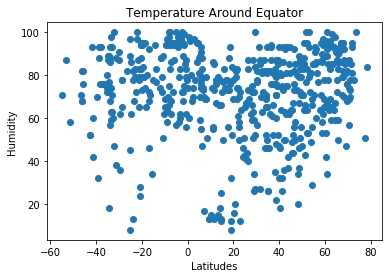

In [11]:
values_lat = all_data['Lat']
values_hum = all_data['Humidity']



plt.scatter(values_lat,values_hum)
plt.title("Temperature Around Equator")
plt.xlabel("Latitudes")
plt.ylabel("Humidity")

#### Latitude vs. Cloudiness Plot

In [1]:
values_lat = all_data['Lat']
values_cloud = all_data['Cloudiness']



plt.scatter(values_lat,values_cloud)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness")

NameError: name 'all_data' is not defined

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind')

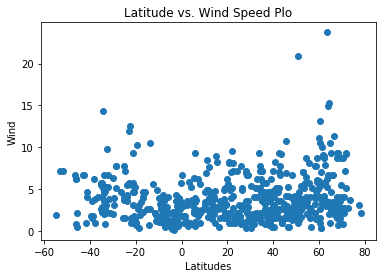

In [13]:
values_lat = all_data['Lat']
values_wind = all_data['Wind Speed']



plt.scatter(values_lat,values_wind)
plt.title("Latitude vs. Wind Speed Plo")
plt.xlabel("Latitudes")
plt.ylabel("Wind")

## Linear Regression

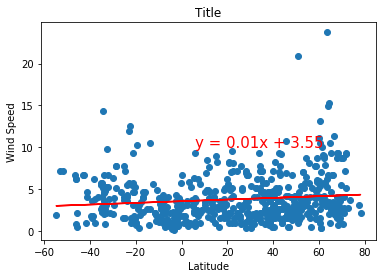

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, x_lab, y_lab):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()
    
linear_regression(values_lat, values_wind, 'Title', 'Latitude', 'Wind Speed')

In [15]:
# Filter to Northern Hemisphere
df_northern = all_data.loc[all_data['Lat'] > 0]
df_northern

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,93,GL,1584329447,47,69.22,-51.10,-9.40,3.60
3,Jasper,90,US,1584329424,81,37.20,-94.35,42.80,1.50
5,Upernavik,0,GL,1584329476,78,72.79,-56.15,-22.16,2.75
8,Loreto,100,MX,1584329476,58,22.27,-101.97,64.54,8.07
9,Saint George,1,US,1584329476,66,37.10,-113.58,55.99,4.10
...,...,...,...,...,...,...,...,...,...
565,Haines Junction,7,CA,1584329602,92,60.75,-137.51,17.78,0.34
566,Little Rock,90,US,1584329603,81,34.75,-92.29,45.00,6.20
567,Marzuq,100,YE,1584329603,66,14.40,46.47,66.20,1.00
568,Gorom-Gorom,93,BF,1584329603,13,14.44,-0.24,78.33,4.78


In [16]:
# Filter to Southern Hemisphere
df_southern = all_data.loc[all_data['Lat'] < 0]
df_southern

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Ushuaia,40,AR,1584329445,71,-54.80,-68.30,53.60,1.96
2,Rikitea,3,PF,1584329417,79,-23.12,-134.97,79.63,5.68
4,Saldanha,99,ZA,1584329475,63,-33.01,17.94,64.40,3.10
6,Mataura,97,NZ,1584329476,68,-46.19,168.86,53.01,6.26
7,Ahipara,100,NZ,1584329476,74,-35.17,173.17,66.85,5.48
...,...,...,...,...,...,...,...,...,...
547,Vila Velha,20,BR,1584329374,88,-20.33,-40.29,77.00,1.50
548,Inongo,80,CD,1584329599,95,-1.95,18.27,72.01,0.63
552,Tsiroanomandidy,41,MG,1584329600,95,-18.77,46.03,66.74,0.31
561,Poso,85,ID,1584329601,75,-1.40,120.75,75.78,2.13


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

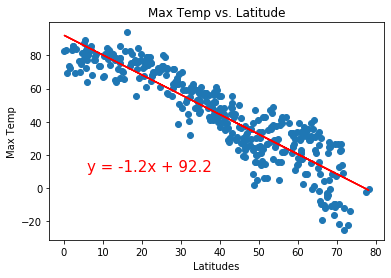

In [17]:
values_north_temp = df_northern['Max Temp']
values_north_lat = df_northern['Lat']

linear_regression(values_north_lat, values_north_temp, 'Max Temp vs. Latitude', 'Latitudes', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

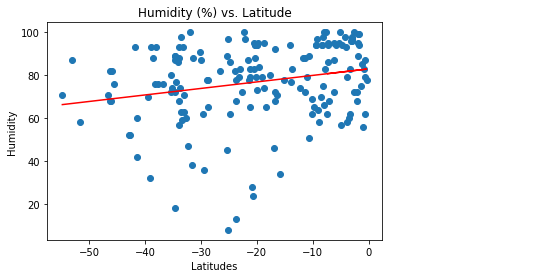

In [18]:
values_north_hum = df_southern['Humidity']
values_north_lat = df_southern['Lat']

linear_regression(values_north_lat, values_north_hum, 'Humidity (%) vs. Latitude', 'Latitudes', 'Humidity')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

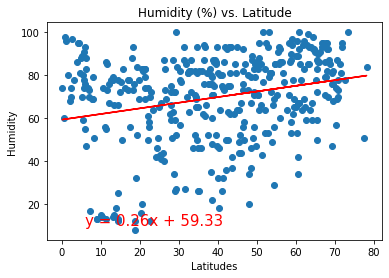

In [19]:
values_north_hum = df_northern['Humidity']
values_north_lat = df_northern['Lat']

linear_regression(values_north_lat, values_north_hum, 'Humidity (%) vs. Latitude', 'Latitudes', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

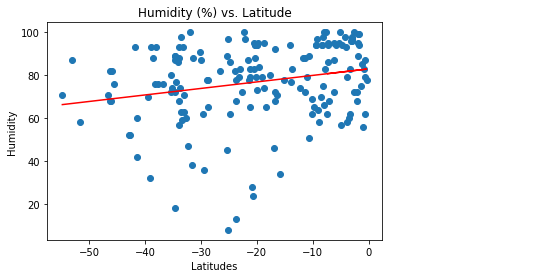

In [20]:
values_north_hum = df_southern['Humidity']
values_north_lat = df_southern['Lat']

linear_regression(values_north_lat, values_north_hum, 'Humidity (%) vs. Latitude', 'Latitudes', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

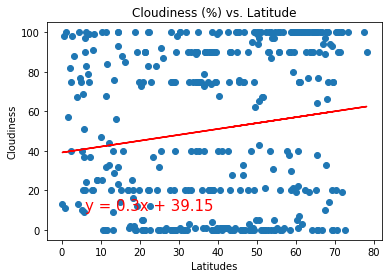

In [21]:
values_north_cloud = df_northern['Cloudiness']
values_north_lat = df_northern['Lat']

linear_regression(values_north_lat, values_north_cloud, 'Cloudiness (%) vs. Latitude', 'Latitudes', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

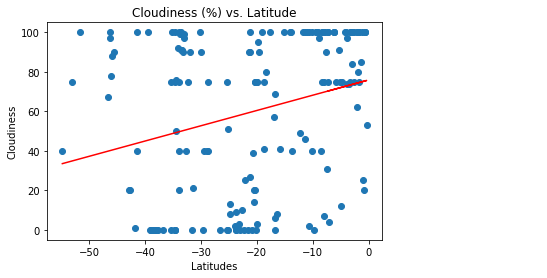

In [22]:
values_north_cloud = df_southern['Cloudiness']
values_north_lat = df_southern['Lat']

linear_regression(values_north_lat, values_north_cloud, 'Cloudiness (%) vs. Latitude', 'Latitudes', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

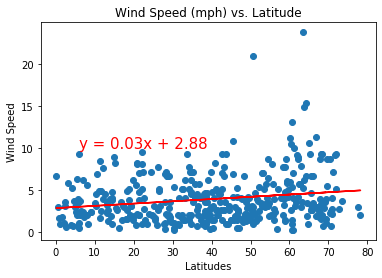

In [23]:
values_north_wind = df_northern['Wind Speed']
values_north_lat = df_northern['Lat']

linear_regression(values_north_lat, values_north_wind, 'Wind Speed (mph) vs. Latitude', 'Latitudes', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

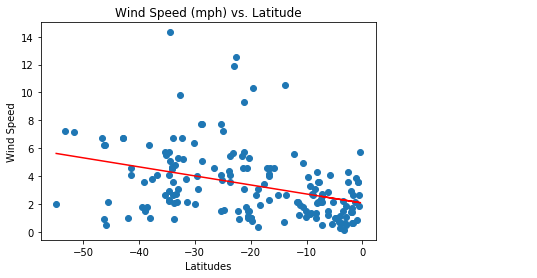

In [24]:
values_north_wind = df_southern['Wind Speed']
values_north_lat = df_southern['Lat']

linear_regression(values_north_lat, values_north_wind, 'Wind Speed (mph) vs. Latitude', 'Latitudes', 'Wind Speed')